In [9]:
# import scipy.io as sio
# import mne

import numpy as np
import matplotlib.pyplot as plt
# import matplotlib as mpl
from scipy.io import loadmat

import mne

# from mne.decoding import ReceptiveField
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import scale
# from sklearn.preprocessing import StandardScaler

# import copy
# import torch
# from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

# from tqdm.auto import tqdm

# import random

In [6]:
# makes sure the plots are printed in the notebook311
# necesairy for the interactive plots
%matplotlib notebook


# location of files
stimuli_location = "Stimuli/Text"
eeg_location = "EEG/Subject"

The Cell below allows you to select the data for the graphs. Comment in and out as required.
Provided are the commands for the pre provided results in the repository.
The other models must be created in the Train.npy first and added here in the same style.


In [7]:
# select data to load
sub = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
sun = [1]
plot_data = []

results_folder = 'results/'
second_folder = 'randoms/'

# start/ end time of relevant time period of word onset.
tmin = 0
tmax = 0.6

types = ['coefs', 'scores','errors']

# change tuples as required. form: file name, legend name, colour, single or multi 



# pearson
plot_data.append(("pearson_100000.npy",'Broderick (1-8Hz)',"b", "single"))

# static
plot_data.append(("static_100000.npy","static","brown", "single"))

# bert_4_false
plot_data.append(("bert_4_False_100000.npy","b4", "red", "single"))



Cell below changes the info into the right format.
Need to run this everytime you change the above cell

In [10]:
coefs = []
errors = []
scores = []

multi_coefs_avg = []
multi_coefs_avg2 = []
multi_coefs_std = []
multi_coefs_std2 = []
multi_coefs_std3 = []
multi_coefs_std4 = []

multi_errors_avg = []
multi_errors_avg2 = []
multi_errors_std = []
multi_errors_std2 = []
multi_errors_std3 = []
multi_errors_std4 = []

multi_scores_avg = []
multi_scores_avg2 = []
multi_scores_std = []
multi_scores_std2 = []
multi_scores_std3 = []
multi_scores_std4 = []

for tup in plot_data:
    
    if tup[3] == "single":
        # load the data of the subjects you want to include + square scores to get r2
        coef = np.load(results_folder + "coefs/" + tup[0])[sub-1]
        error = np.load(results_folder + "errors/" + tup[0])[sub-1]
        score = np.load(results_folder + "scores/" + tup[0])[sub-1]**2
        score = np.nan_to_num(score)

        # mean out the subject axis
        coef = coef.mean(axis=0)
        error = error.mean(axis=0)
        score = score.mean(axis=0)

        # mean out the cross validation axis
        coef = coef.mean(axis=0)
        error = error.mean(axis=0)
        score = score.mean(axis=0)

        coefs.append(coef)
        errors.append(error)
        scores.append(score)
        
    elif tup[3] == "multi":
        
        multi_coef_avg = np.load(results_folder + tup[0] + "coefs-avg.npy")[sub-1]
        multi_coef_avg2 = np.load(results_folder + tup[0] + "coefs-avg2.npy")[sub-1]
        multi_coef_std = np.load(results_folder + tup[0] + "coefs-std.npy")[sub-1]
        multi_coef_std2 = np.load(results_folder + tup[0] + "coefs-std2.npy")[sub-1]
        multi_coef_std3 = np.load(results_folder + tup[0] + "coefs-std3.npy")
        multi_coef_std4 = np.load(results_folder + tup[0] + "coefs-std4.npy")

        multi_error_avg = np.load(results_folder + tup[0] + "errors-avg.npy")[sub-1]
        multi_error_avg2 = np.load(results_folder + tup[0] + "errors-avg2.npy")[sub-1]
        multi_error_std = np.load(results_folder + tup[0] + "errors-std.npy")[sub-1]
        multi_error_std2 = np.load(results_folder + tup[0] + "errors-std2.npy")[sub-1]
        multi_error_std3 = np.load(results_folder + tup[0] + "errors-std3.npy")
        multi_error_std4 = np.load(results_folder + tup[0] + "errors-std4.npy")

        multi_score_avg = np.load(results_folder + tup[0] + "scores-avg.npy")[sub-1]
        multi_score_avg2 = np.load(results_folder + tup[0] + "scores-avg2.npy")[sub-1]
        multi_score_std = np.load(results_folder + tup[0] + "scores-std.npy")[sub-1]
        multi_score_std2 = np.load(results_folder + tup[0] + "scores-std2.npy")[sub-1]
        multi_score_std3 = np.load(results_folder + tup[0] + "scores-std3.npy")
        multi_score_std4 = np.load(results_folder + tup[0] + "scores-std4.npy")
                                   
                                   
        multi_coef_avg = multi_coef_avg.mean(axis=0)
        multi_coef_avg2 = multi_coef_avg2.mean(axis=0)
        multi_coef_std = multi_coef_std.mean(axis=0)
        multi_coef_std2 = multi_coef_std2.mean(axis=0)

        multi_error_avg = multi_error_avg.mean(axis=0)
        multi_error_avg2 = multi_error_avg2.mean(axis=0)
        multi_error_std = multi_error_std.mean(axis=0)
        multi_error_std2 = multi_error_std2.mean(axis=0)

        multi_score_avg = multi_score_avg.mean(axis=0)
        multi_score_avg2 = multi_score_avg2.mean(axis=0)
        multi_score_std = multi_score_std.mean(axis=0)
        multi_score_std2 = multi_score_std2.mean(axis=0)
                                   
                                   
                                   
        multi_coef_avg = multi_coef_avg.mean(axis=0)
        multi_coef_avg2 = multi_coef_avg2.mean(axis=0)
        multi_coef_std = multi_coef_std.mean(axis=0)
        multi_coef_std2 = multi_coef_std2.mean(axis=0)

        multi_error_avg = multi_error_avg.mean(axis=0)
        multi_error_avg2 = multi_error_avg2.mean(axis=0)
        multi_error_std = multi_error_std.mean(axis=0)
        multi_error_std2 = multi_error_std2.mean(axis=0)

        multi_score_avg = multi_score_avg.mean(axis=0)
        multi_score_avg2 = multi_score_avg2.mean(axis=0)
        multi_score_std = multi_score_std.mean(axis=0)
        multi_score_std2 = multi_score_std2.mean(axis=0)
                                   
                                   
        multi_coefs_avg.append(multi_coef_avg)
        multi_coefs_avg2.append(multi_coef_avg2)
        multi_coefs_std.append(multi_coef_std)
        multi_coefs_std2.append(multi_coef_std2)
        multi_coefs_std3.append(multi_coef_std3)
        multi_coefs_std4.append(multi_coef_std4)

        multi_errors_avg.append(multi_error_avg)
        multi_errors_avg2.append(multi_error_avg2)
        multi_errors_std.append(multi_error_std)
        multi_errors_std2.append(multi_error_std2)
        multi_errors_std3.append(multi_error_std3)
        multi_errors_std4.append(multi_error_std4)

        multi_scores_avg.append(multi_score_avg)
        multi_scores_avg2.append(multi_score_avg2)
        multi_scores_std.append(multi_score_std)
        multi_scores_std2.append(multi_score_std2)
        multi_scores_std3.append(multi_score_std3)
        multi_scores_std4.append(multi_score_std4)

        

n_channels = coefs[0].shape[0]
n_points =  coefs[0].shape[1]

# define a n_points long array that defines what time a coefficent belongs to.
# used as the x axis in plotmtrfs.
times = np.array(range(0,n_points))/ 128

# create the mne info file with the right montage (layout of channels)
# mne is a library we use to process EEG files, or in this case visualise them.
montage =  mne.channels.make_standard_montage('biosemi128');
#montage.selection = montage.selection[:n_channels]
info = mne.create_info(montage.ch_names[:n_channels], n_channels, 'eeg', montage=montage);

<ipython-input-10-b159cc723f6f>:140: DeprecationWarning: Passing montage to create_info is deprecated and will be removed in 0.21, use raw.set_montage (or epochs.set_montage, etc.) instead
  info = mne.create_info(montage.ch_names[:n_channels], n_channels, 'eeg', montage=montage);


functions that generate different graphs

In [20]:
def plot_curve(ch,sd,ax,title):
    i = 0
    j = 0
    for tup in plot_data:
        if tup[3] == "single":
            ax.plot(times,coefs[i][ch], label= tup[1])
            i+=1

        elif tup[3] == "multi":
            ax.plot(times,multi_coefs_avg[j][ch], label = tup[1] + " mean")
            ax.fill_between(times,multi_coefs_avg[j][ch]-multi_coefs_std3[j][ch]*sd, multi_coefs_avg[j][ch]+multi_coefs_std3[j][ch]*sd, alpha=0.2, label =tup[1] + " "+ str(sd) + "sd")
            j+=0
    ax.axhline(0, ls='--', color='black')
    #ax.set_ylim(-0.09 ,0.05)
    ax.set(title=title)

In [11]:
def plot_r2(sd,ax):
    ix_chs = np.arange(n_channels)
    #ax.plot(ix_chs, mean_scores)

    i = 0
    j = 0
    for tup in plot_data:
        if tup[3] == "single":
            ax.plot(ix_chs,scores[i], label= tup[1])
            i+=1

        elif tup[3] == "multi":
            ax.plot(ix_chs,multi_scores_avg2[j], label = tup[1] + " mean")
            ax.fill_between(ix_chs,multi_scores_avg2[j]-multi_scores_std4[j]*sd, multi_scores_avg2[j]+multi_scores_std4[j]*sd, alpha=0.2, label =tup[1] + " "+ str(sd) + "sd")
            j+=1

In [27]:
def plot_overtime(sel, time_plot, ax):

    plot_coefs = coefs[sel]
    #montage.selection = montage.selection[:128]
    info = mne.create_info(montage.ch_names[:128], 128, 'eeg', montage=montage)

    # Print mean coefficients acffross all time delays / channels 
    #time_plot = 0.36  # For highlighting a specific time.
    #fig, ax = plt.subplots(figsize=(4, 8))
    max_coef = plot_coefs.max()
    min_coef = plot_coefs.min()
    ax.pcolormesh(times, ix_chs, plot_coefs, cmap='RdBu_r',
                  vmin=-max_coef, vmax=max_coef, shading='gouraud')
    ax.axvline(time_plot, ls='--', color='k', lw=2)
    ax.set(xlabel='Delay (s)', ylabel='Channel', title="Mean Model\nCoefficients",
           xlim=times[[0, -1]], ylim=[len(ix_chs) - 1, 0],
           xticks=np.arange(tmin, tmax + .2, .2))
    plt.setp(ax.get_xticklabels(), rotation=45)
    mne.viz.tight_layout()

    
def plot_brain(a1, b1, sel, ax):
    # plot_coefs = np.tile(np.expand_dims(scores[1],1),78) - np.tile(np.expand_dims(scores[0],1),78)
    plot_coefs = coefs[sel]

    #c = np.mean([a1,b1])
    a = times> a1
    b = times< b1
    selection = np.flatnonzero(a & b)


    s1 = plot_coefs[:,0].shape[0]
    tmp = np.zeros((len(selection),s1))
    for i in range(len(selection)):
        tmp[i] = plot_coefs[:,selection[i]]

    mean_plot = np.mean(tmp,0)
    
    
    max_coef = plot_coefs.max()
    min_coef = plot_coefs.min()
    # Make a topographic map of coefficients for a given delay (see Fig 2C in [1])
    #ix_plot = np.argmin(np.abs(time_plot - times))
    mne.viz.plot_topomap(mean_plot, pos=info, axes=ax, show=False,
                         vmin=min_coef*1.2, vmax=max_coef*1.5, names = range(0,128), show_names=False, sensors=False)
    ax.set(title="Brain plot")
    mne.viz.tight_layout()

In [14]:

def plot_bar_scores(ax,time = None):
    ix_chs = np.arange(n_channels)
    
    i = 0
    j = 0
    for tup in plot_data:
        if tup[3] == "single":
            if time == None:
                ax.bar(i+j,scores[i].mean(), label= tup[1])
            else:
                ax.bar(i+j,scores[i][time], label= tup[1])
            i+=1

        elif tup[3] == "multi":
            if time == None:
                ax.bar(i+j,multi_scores_avg2[j].mean(), label = tup[1] + " mean" )
            else:
                ax.bar(i+j,multi_scores_avg2[j][time], label = tup[1] + " mean")
            j+=1
    plt.xticks(range(0,i+j), [tup[1] for tup in plot_data]);
    #ax.set_ylim(0.08 ,0.12)
            
        

def plot_bar_trf(ax,ch,time = None):
    ix_chs = np.arange(n_channels)
    
    i = 0
    j = 0
    for tup in plot_data:
        if tup[3] == "single":
            if time == None:
                ax.bar(i+j,coefs[i][ch].mean(), label= tup[1])
            else:
                ax.bar(i+j,coefs[i][ch][time], label= tup[1])
            i+=1

        elif tup[3] == "multi":
            if time == None:
                ax.bar(i+j,multi_coefs_avg[j][ch].mean(), label = tup[1] + " mean" )
            else:
                ax.bar(i+j,multi_coefs_avg[j][ch][time], label = tup[1] + " mean")
            j+=1
    plt.xticks(range(0,i+j), [tup[1] for tup in plot_data]);
    ax.set_ylim(-0.08 ,-0.10)
            

Below are examples of the different graphs in the paper. They all scale with the number of models added above.

<IPython.core.display.Javascript object>


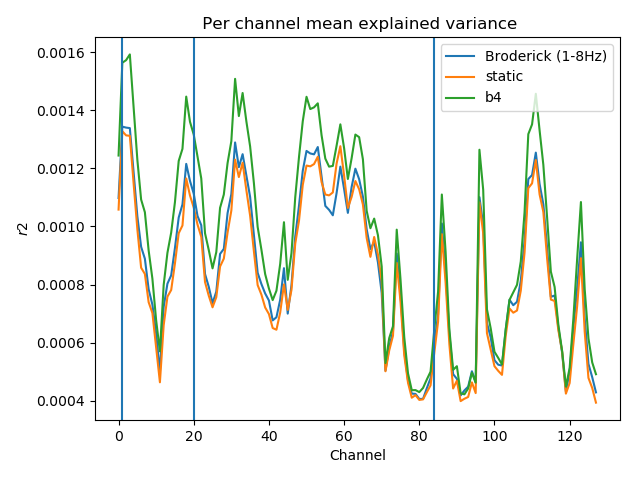

In [15]:

    
sd =1.6

fig, ax = plt.subplots()
plot_r2(sd,ax)


#ax.axhline(0, ls='--', color='r')
ax.set(title=" Per channel mean explained variance", xlabel="Channel", ylabel="$r2$")
mne.viz.tight_layout()
plt.legend()
plt.axvline(1, label= 'Cz')
plt.text(1,-0.00005,'Cz',rotation=0)
plt.axvline(84, label= 'Fz')
plt.text(84,-0.00005,'Fz',rotation=0)
plt.axvline(20, label= 'Pz')
plt.text(20,-0.00005,'Pz',rotation=0);

<IPython.core.display.Javascript object>


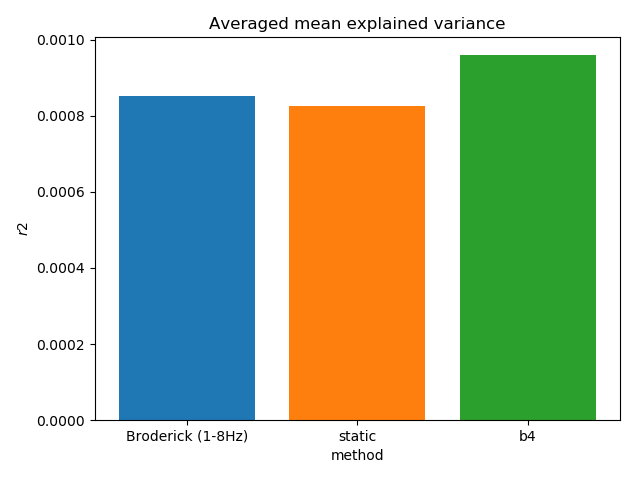

In [16]:
fig, ax = plt.subplots()
    

plot_bar_scores(ax)

ax.set(title="Averaged mean explained variance", xlabel="method", ylabel="$r2$")
mne.viz.tight_layout()

<IPython.core.display.Javascript object>


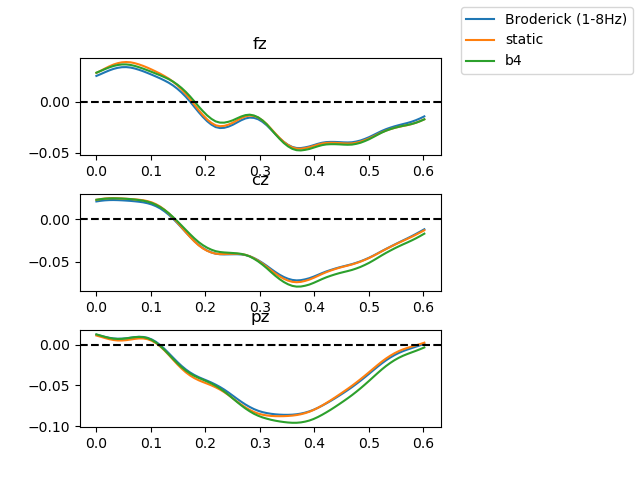

In [21]:


sd = 1.6
pl =1
nrow = 3
ncol = 2
widths = [0,3,0.1,0.1]
heights = [0,33,0.33,0.33]
# gr = grid.GridSpec(wspace= , hspace= width_ratios= , height_ratios= )
gri = {'wspace':0.5,'hspace':0.4,'width_ratios':[1,0.1]}
fig, axes = plt.subplots(nrow,ncol, squeeze = False, gridspec_kw = gri)
plot_curve(84,sd,axes[0,0],'fz')
plot_curve(0,sd,axes[1,0],'cz')
plot_curve(20,sd,axes[2,0],'pz')
# plot_brain(0.148,0.203,pl,axes[0,0])
# plot_brain(0.297,0.352,pl,axes[1,0])
# plot_brain(0.359,0.422,pl,axes[2,0])
axes[0,1].axis("off")
axes[1,1].axis("off")
axes[2,1].axis("off")
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1))
fig.show();

# print("average and at 0.4 distence from sd for pearson",  np.mean((coefs[ch] - mean_coefs2[ch])/mean_coefs3[ch]), (mean_coefs1[ch][51] - mean_coefs2[ch][51])/mean_coefs3[ch][51])
# print("average and at 0.4 distence from sd for bert",  np.mean((mean_coefs[ch] - mean_coefs2[ch])/mean_coefs3[ch]),(mean_coefs[ch][51] - mean_coefs2[ch][51])/mean_coefs3[ch][51])

<IPython.core.display.Javascript object>


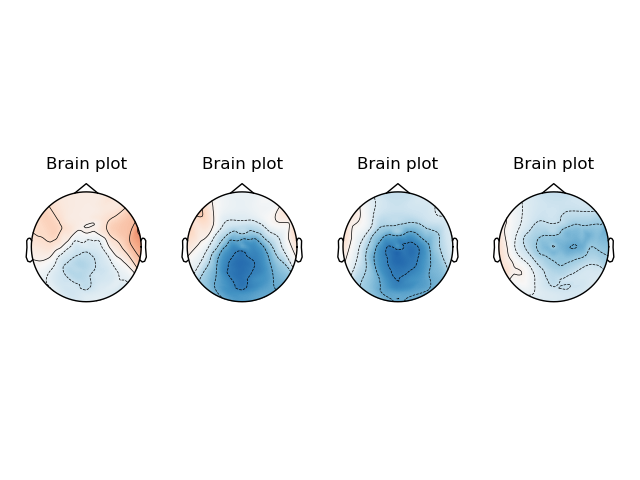

In [29]:
sd = 1.6
pl =0
nrow = 3
ncol = 3
#gri = {'wspace':0.5,'hspace':0.4,'width_ratios':[1,2,0.1]}
fig, axes = plt.subplots(1,4, squeeze = False)
plot_brain(0.148,0.203,pl,axes[0,0])
plot_brain(0.297,0.352,pl,axes[0,1])
plot_brain(0.359,0.422,pl,axes[0,2])
plot_brain(0.477,0.531,pl,axes[0,3])

<IPython.core.display.Javascript object>


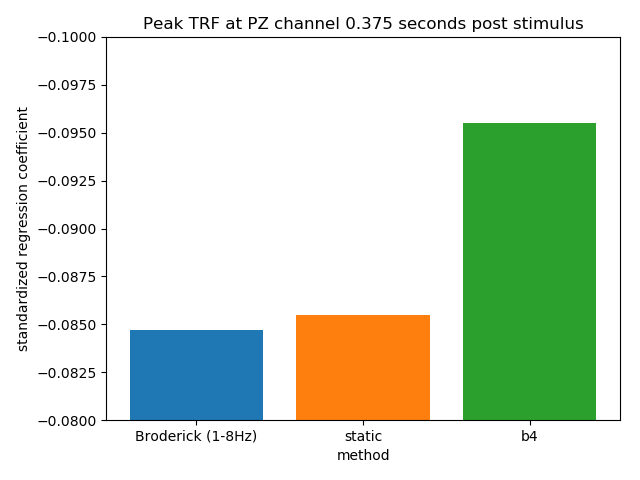

In [31]:
fig, ax = plt.subplots()
    

plot_bar_trf(ax,20,48)

ax.set(title="Peak TRF at PZ channel 0.375 seconds post stimulus", xlabel="method", ylabel="standardized regression coefficient")
mne.viz.tight_layout()

In [32]:
# these scores are printed when creating the surprisal values in Calculate_surprise.npy
un_normalized_bert_avg = [0.5870393057612936,2.0420587807010726, 2.5685089552784395, 2.866974610385511, 3.10740040804475, 4.263671552982966, 5.972907090958225, 6.513370094547119, 6.8474688960631065, 7.083961212416482]

<IPython.core.display.Javascript object>


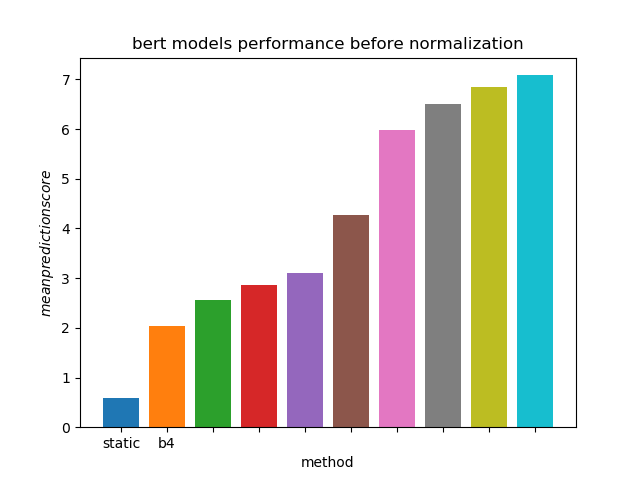

In [33]:
fig, ax = plt.subplots()
ix_chs = np.arange(n_channels)


for i,avg in enumerate(un_normalized_bert_avg):
    
    ax.bar(i,avg)


ax.set(title="bert models performance before normalization", xlabel="method", ylabel="$mean prediction score$")
plt.xticks(range(0,len(un_normalized_bert_avg)), labels[1:]);